In [3]:
import pandas as pd
import matplotlib.pyplot as plt
corolla=pd.read_excel("corolla.xlsx")
corolla.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


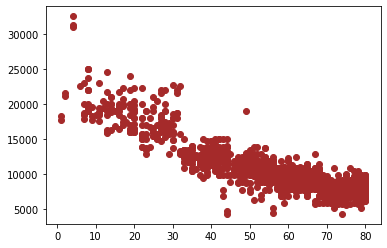

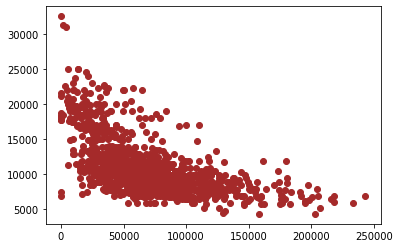

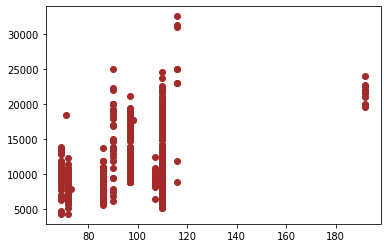

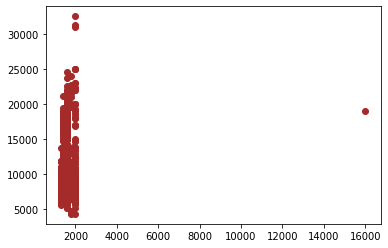

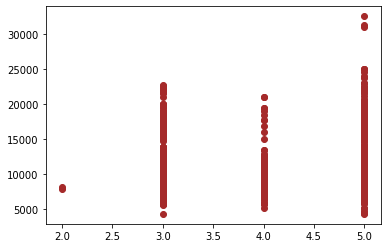

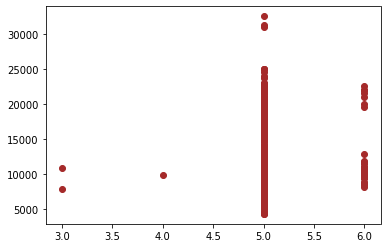

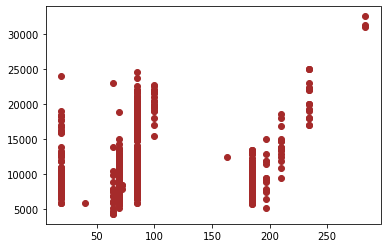

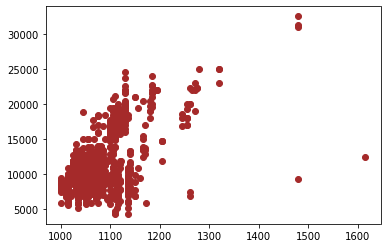

In [11]:
#EDA
corolla.shape
corolla.dtypes
corolla.isna
corolla.describe()
# only looking at the variables that we need
plt.scatter(x=corolla['Age_08_04'],y=corolla['Price'],color="brown")
plt.show()
plt.scatter(x=corolla['KM'],y=corolla['Price'],color="brown")
plt.show()
plt.scatter(x=corolla['HP'],y=corolla['Price'],color="brown")
plt.show()
plt.scatter(x=corolla['cc'],y=corolla['Price'],color="brown")
plt.show()
plt.scatter(x=corolla['Doors'],y=corolla['Price'],color="brown")
plt.show()
plt.scatter(x=corolla['Gears'],y=corolla['Price'],color="brown")
plt.show()
plt.scatter(x=corolla['Quarterly_Tax'],y=corolla['Price'],color="brown")
plt.show()
plt.scatter(x=corolla['Weight'],y=corolla['Price'],color="brown")
plt.show()

In [4]:
corolla_new=corolla[['Price','Age_08_04','KM','HP','Quarterly_Tax','Weight','Automatic_airco','Guarantee_Period','Powered_Windows']].copy()
corolla_new.head()

summary=corolla_new.describe()
summary

,Price,Age_08_04,KM,HP,Quarterly_Tax,Weight,Automatic_airco,Guarantee_Period,Powered_Windows
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000
mean,10730.824513,55.947075,68533.259749,101.502089,87.122563,1072.45961,0.056407,3.815460,0.561978
std,3626.964585,18.599988,37506.448872,14.981080,41.128611,52.64112,0.230786,3.011025,0.496317
min,4350.000000,1.000000,1.000000,69.000000,19.000000,1000.00000,0.000000,3.000000,0.000000
25%,8450.000000,44.000000,43000.000000,90.000000,69.000000,1040.00000,0.000000,3.000000,0.000000
50%,9900.000000,61.000000,63389.500000,110.000000,85.000000,1070.00000,0.000000,3.000000,1.000000
75%,11950.000000,70.000000,87020.750000,110.000000,85.000000,1085.00000,0.000000,3.000000,1.000000
max,32500.000000,80.000000,243000.000000,192.000000,283.000000,1615.00000,1.000000,36.000000,1.000000


In [8]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(corolla_new,test_size=0.3)

In [11]:

###LASSO MODEL###
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.01,normalize=True)
lasso.fit(train.iloc[:,:],train.Price)

#coefficient values for all independent variables#
lasso.coef_
lasso.intercept_ #0.9573216111220972

0.9573216111220972

<BarContainer object of 9 artists>

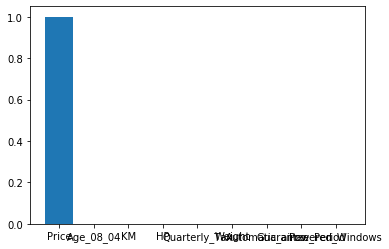

In [13]:
import matplotlib.pyplot as plt
plt.bar(height=pd.Series(lasso.coef_),x=pd.Series(corolla_new.columns[:]))


In [14]:
lasso.alpha
pred_lasso=lasso.predict(train.iloc[:,:])
pred_lasso


array([ 6950.33207444,  8950.15214719, 12899.79679089, ...,
        7750.26010354, 10949.97221995,  9750.0801763 ])

In [17]:
#Adjusted r-square#
lasso.score(train.iloc[:,:],train.Price) #0.9999999919065469
#RMSE
import numpy as np
np.sqrt(np.mean((pred_lasso-train.Price)**2)) #0.3170173496829315

0.3170173496829315

In [18]:
#running lasso regression of set of alpha values and observing how the r-squared,train_Rmse and test_rmse are changing with alpha values
train_rmse = []
test_rmse = []
R_sqrd = []
alphas = np.arange(0,30,0.05)
for i in alphas:
    LRM = Lasso(alpha = i,normalize=True,max_iter=500)
    LRM.fit(train.iloc[:,:10],train.Price)
    R_sqrd.append(LRM.score(train.iloc[:,:10],train.Price))
    train_rmse.append(np.sqrt(np.mean((LRM.predict(train.iloc[:,:10]) - train.Price)**2)))
    test_rmse.append(np.sqrt(np.mean((LRM.predict(test.iloc[:,:10]) - test.Price)**2)))
    

C:\Users\Rajesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
C:\Users\Rajesh\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)


Text(0, 0.5, 'test_rmse')

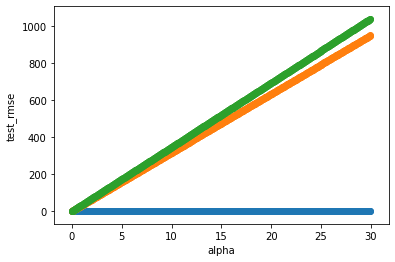

In [19]:

# Alpha vs R_Squared values
plt.scatter(x=alphas,y=R_sqrd);plt.xlabel("alpha");plt.ylabel("R_Squared")

# Alpha vs train rmse
plt.scatter(x=alphas,y=train_rmse);plt.xlabel("alpha");plt.ylabel("train_rmse")

# Alpha vs test rmse
plt.scatter(x=alphas,y=test_rmse);plt.xlabel("alpha");plt.ylabel("test_rmse")

In [22]:
#Ridge regression
from sklearn.linear_model import Ridge
rm=Ridge(alpha=0.4,normalize=True)
rm.fit(train.iloc[:,:],train.Price)

#coefficients values for all the independent vairbales#
rm.coef_
rm.intercept_ #1076.9932442550762

1076.9932442550762

0.4

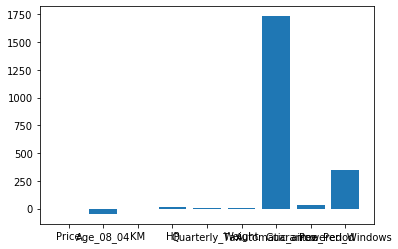

In [24]:
plt.bar(height=pd.Series(rm.coef_),x=pd.Series(corolla_new.columns[:]))
rm.alpha


In [25]:
pred_rm=rm.predict(train.iloc[:,:])
pred_rm

array([ 8052.67612124,  8359.22649035, 12265.41452465, ...,
        8223.61990869, 11000.50540269, 11247.85374136])

In [28]:
#adjusted r-square
rm.score(train.iloc[:,:],train.Price) #0.9467628299452738
np.sqrt(np.mean((pred_rm-train.Price)**2)) #813.0618413939305

813.0618413939305

In [29]:
### Running a Ridge Regressor of set of alpha values and observing how the R-Squared, train_rmse and test_rmse are changing with change in alpha values
train_rmse = []
test_rmse = []
R_sqrd = []
alphas = np.arange(0,100,0.05)
for i in alphas:
    RM = Ridge(alpha = i,normalize=True)
    RM.fit(train.iloc[:,:10],train.Price)
    R_sqrd.append(RM.score(train.iloc[:,:10],train.Price))
    train_rmse.append(np.sqrt(np.mean((RM.predict(train.iloc[:,:10]) - train.Price)**2)))
    test_rmse.append(np.sqrt(np.mean((RM.predict(test.iloc[:,:10]) - test.Price)**2)))

Text(0, 0.5, 'test_rmse')

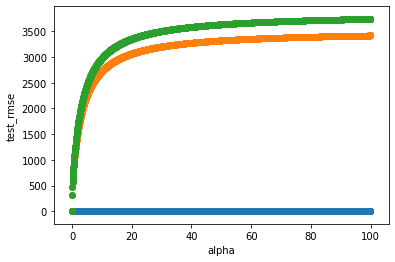

In [30]:
### Plotting train_rmse,test_rmse,R_Squared values with respect to alpha values


# Alpha vs R_Squared values
plt.scatter(x=alphas,y=R_sqrd);plt.xlabel("alpha");plt.ylabel("R_Squared")

# Alpha vs train rmse
plt.scatter(x=alphas,y=train_rmse);plt.xlabel("alpha");plt.ylabel("train_rmse")

# Alpha vs test rmse
plt.scatter(x=alphas,y=test_rmse);plt.xlabel("alpha");plt.ylabel("test_rmse")
